<a href="https://colab.research.google.com/github/adizquier/03MIAR_Algoritmos-de-Optimizacion/blob/main/Algoritmos_AG2_Adri%C3%A1n_Izquierdo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Adrián Izquierdo Abril <br>
Link:   https://colab.research.google.com/drive/1agmQEnSGNUhBrocTfD1kq3qewVjNoDQo?usp=sharing <br>
Github: https://github.com/adizquier/03MIAR_Algoritmos-de-Optimizacion
<br>




In [12]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

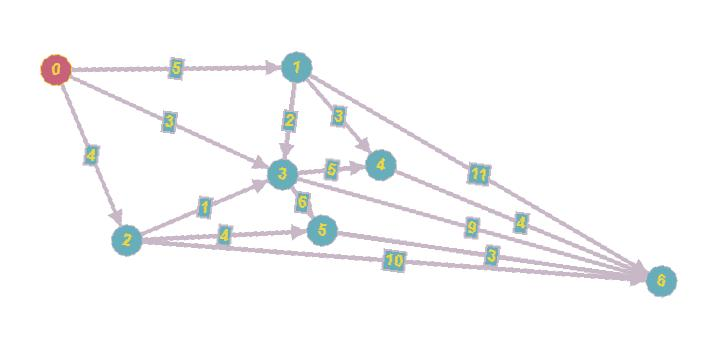

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [13]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [14]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [15]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [16]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [17]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


Se ha modificado la siguiente función respecto al código original, específicamente en la indexación de la matriz `COSTES` dentro del bucle. La implementación original (`COSTES[S[i]][i]`) asumía que la tupla S contenía los agentes asignados a cada tarea $i$.

Sin embargo, para mantener la coherencia con la teoría vista en clase, donde S representa las tareas asignadas al agente $i$, se ha invertido el acceso a la matriz para reflejar correctamente esta estructura de datos.

In [18]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  return VALOR

valor((3,2,  ),COSTES)

53

Las siguientes funciones `CI` y `CS` presentan un cambio con respecto al código original. El cambio se presenta al inicio, donde se calculaba manualmente el coste de las tareas ya asignadas.

Puesto que dicho cálculo coincide exactamente con lo que realiza la función valor, se han eliminado esas líneas y se ha llamado directamente a la función anterior para evitar la duplicidad de código.

Otro cambio significativo se ha realizado en el algoritmo de cálculo de las cotas (superior e inferior). En la implementación original, tanto el bucle principal como la selección de costes iteraban sobre el rango `(len(S), len(COSTES))`. Esta lógica no es del todo correcta, pues asume que las tareas se asignan en orden secuencial estricto.

Dado que la tupla S almacena las tareas ya asignadas (independientemente de su índice), restringir la búsqueda a un rango numérico podría provocar que se ignore el coste de tareas libres con índice bajo, o se evalúen tareas ya ocupadas. Por tanto, la modificación implementada recorre todas las tareas existentes y utiliza la condición lógica `if tarea not in S` para considerar únicamente aquellas que realmente están pendientes de asignación.

In [19]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = valor(S, COSTES)

  #Estimacion
  for tarea in range(len(COSTES)):
    if tarea not in S:
      VALOR += min( [ COSTES[j][tarea] for j in range(len(S), len(COSTES))  ])

  return VALOR

def CS(S,COSTES):
  VALOR = valor(S, COSTES)

  for tarea in range(len(COSTES)):
    if tarea not in S:
      VALOR += max( [ COSTES[j][tarea] for j in range(len(S))  ])

  return VALOR

CI((0,1),COSTES)

68

In [20]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [21]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [22]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    #Aqui he eliminado los corchetes que rodeaban lo que devolvía min() y la indexación [0] para conseguir codigo mas legible
    nodo_prometedor = min(NODOS, key=lambda x:x['ci'])['s']

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  14  iteraciones  para dimension:  4


El algoritmo de Ramificación y Poda permite abordar la resolución de problemas de optimización con una eficiencia práctica superior a la búsqueda exhaustiva. En el caso específico del problema de asignación de tareas, un enfoque de fuerza bruta implicaría una complejidad factorial de $O(n!)$, lo cual resulta computacionalmente intratable a medida que aumenta la dimensión del problema.

En contraposición, la estrategia de podar ramas del árbol de búsqueda, fundamentada en el cálculo de cotas superiores e inferiores, evita la generación y exploración de soluciones que, matemáticamente, se garantiza que no superarán a la mejor solución encontrada hasta el momento.

En conclusión, la definición precisa de las funciones de cota es un factor crítico en este algoritmo. De su capacidad de ajuste depende la reducción efectiva del espacio de búsqueda, permitiendo mejorar drásticamente la eficiencia de la resolución respecto a alternativas puramente combinatorias.

##Descenso del gradiente

In [23]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide. Se ha corregido esta expresión pues la entrada a la función depende de $x$ e $y$ y solamente ponía la $x$ : $$f(x, y) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [24]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

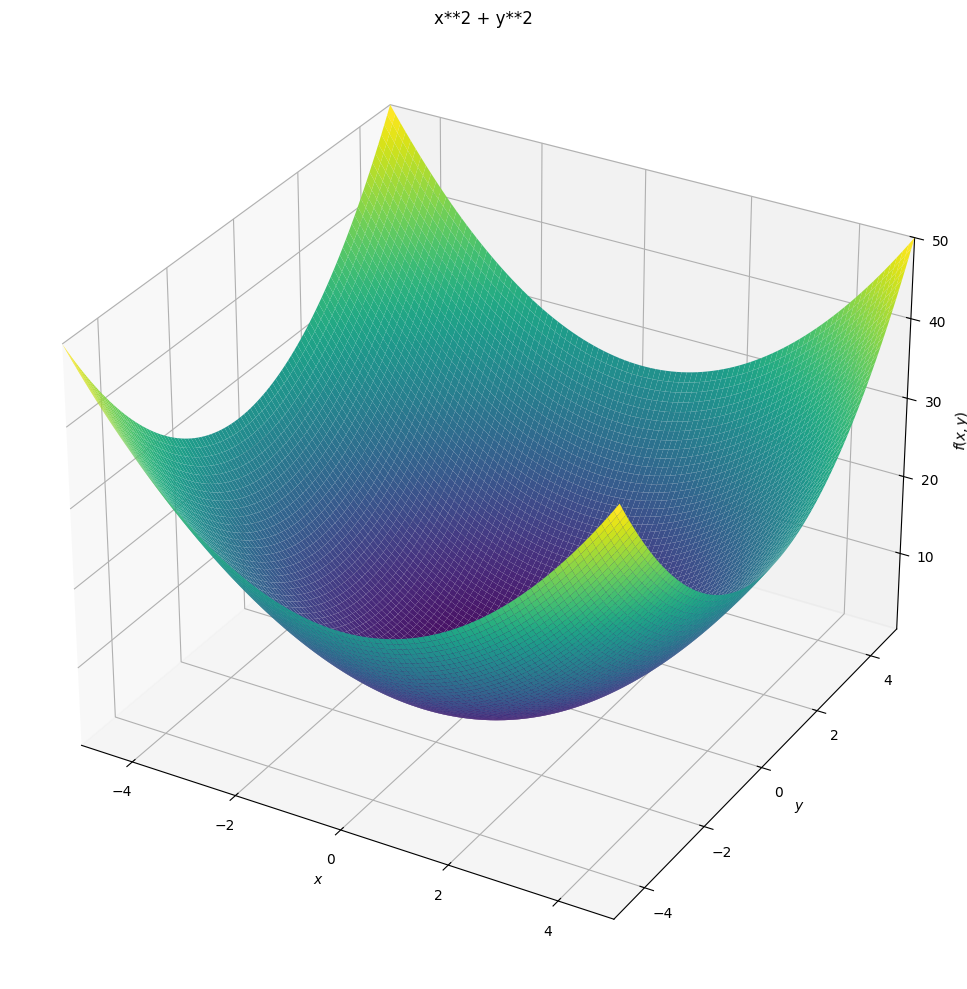

In [25]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

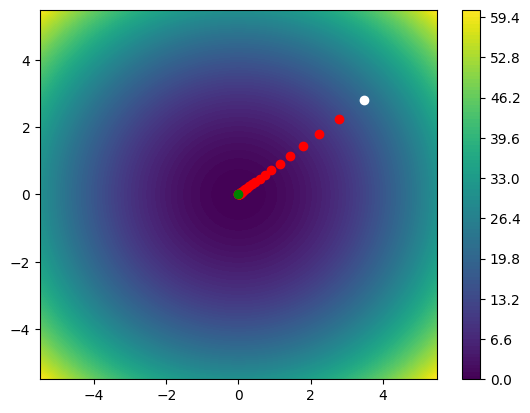

Solucion: [4.956386317849771e-05, 4.002438532628079e-05] 4.058527953923443e-09


In [26]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
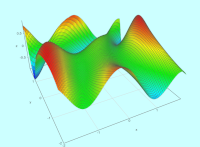


In [27]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


Para poder optimizar la función propuesta y realizar el descenso del gradiente, en situaciones en las que la función presenta una mayor complejidad y el cálculo analítico supone un mayor esfuerzo, la opción habitual es utilizar librerías de diferenciación automática como *PyTorch* o *TensorFlow*.

Sin embargo, para la resolución de este problema, se evitará el uso de estas librerías y se realizará el cálculo de forma manual aplicando los conceptos matemáticos subyacentes.

En primer lugar, se debe calcular el gradiente de la función. Puesto que la complejidad de la expresión matemática dificulta la obtención directa de las derivadas, se utilizará la definición formal de derivada para realizar una aproximación numérica. Dicha definición viene dada por el siguiente límite:

$$f'(u) = \lim_{h \to 0} \frac{f(u+h) - f(u)}{h}$$

Basándose en esta fórmula, y asumiendo un valor de $h$ suficientemente pequeño, se pueden aproximar las derivadas parciales respecto a $x$ e $y$ mediante las siguientes expresiones:

$$\frac{\partial f}{\partial x} \approx \frac{f(x+h, y) - f(x, y)}{h} \quad \frac{\partial f}{\partial y} \approx \frac{f(x, y+h) - f(x, y)}{h}$$

Dadas estas expresiones, se define una función que permite realizar el cálculo del gradiente de la función en un punto.

In [28]:
#Cálculo de derivadas parciales y gradiente
h = 1e-5

def df(Punto):
    h = 1e-5

    # Derivada parcial respecto a la primera variable (x)
    grad_x = (f([Punto[0] + h, Punto[1]]) - f([Punto[0], Punto[1]])) / h

    # Derivada parcial respecto a la segunda variable (y)
    grad_y = (f([Punto[0], Punto[1] + h]) - f([Punto[0], Punto[1]])) / h

    return [grad_x, grad_y]



Se realiza también la gráfica de la función a optimizar utilizando el mismo planteamiento de la función anterior, mediante la librería `simpy`.

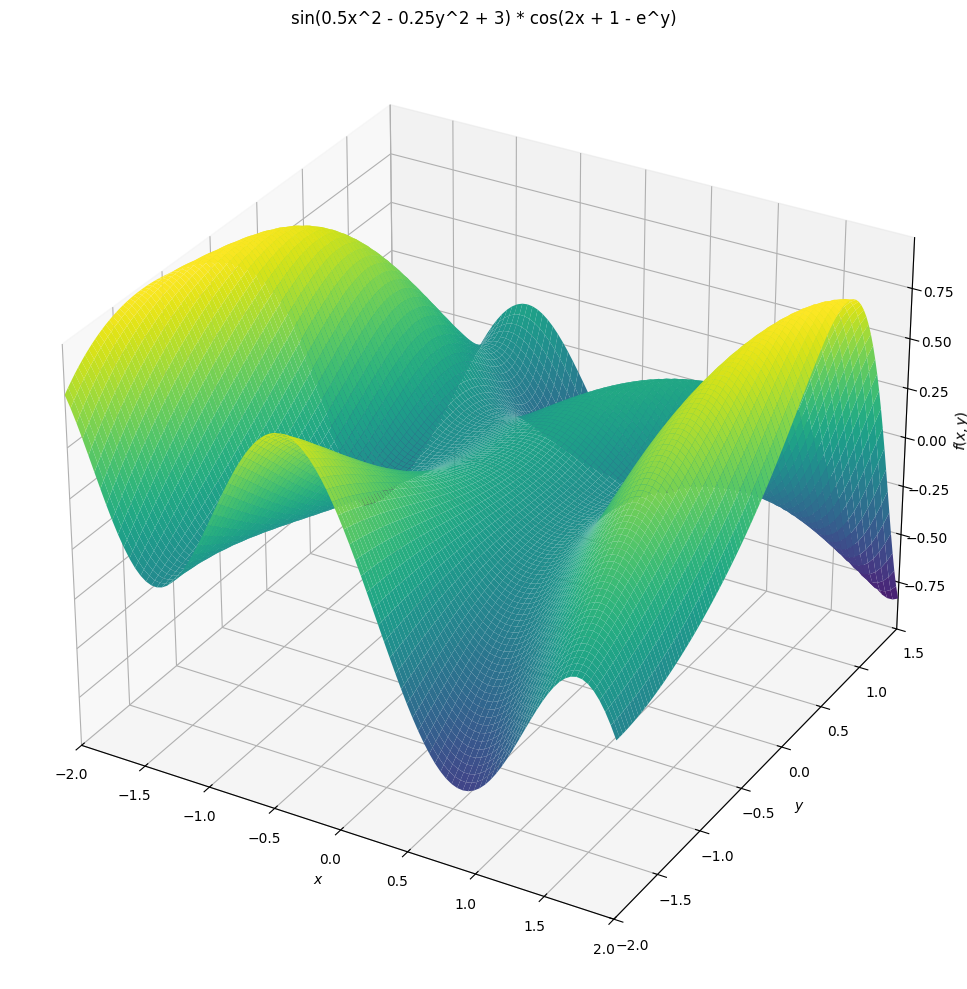

In [29]:
from sympy import symbols, sin, cos, exp
x, y = symbols('x y')

funcion = sin(0.5 * x**2 - 0.25 * y**2 + 3) * cos(2*x + 1 - exp(y))

# 3. Graficamos
plot3d(funcion,
       (x, -2, 2), (y, -2, 1.5),
       title='sin(0.5x^2 - 0.25y^2 + 3) * cos(2x + 1 - e^y)',
       size=(10, 10))

Una vez definidos los pasos previos, y teniendo en cuenta que la principal variación respecto al problema inicial radica en la aproximación numérica del gradiente, se procede a la ejecución del algoritmo siguiendo la misma lógica estructural. Inicialmente, se configura la representación gráfica, ajustando el rango de visualización de 5.5 a 2.5 para apreciar con mayor detalle la topografía de la función y el recorrido del descenso.

A continuación, se establecen los parámetros iniciales: la tasa de aprendizaje (learning rate) y un punto de partida aleatorio. Mediante un bucle iterativo determinado por el número de épocas, se ejecuta el núcleo del algoritmo: cálculo del gradiente en el punto actual y actualización de las coordenadas restando el producto del gradiente por la tasa de aprendizaje. Cabe mencionar que se ha optado por una tasa reducida para generar pasos más cortos, lo que favorece la estabilidad y permite visualizar mejor la tendencia descendente.

En la gráfica resultante se observa cómo, partiendo de una ubicación aleatoria, el algoritmo optimiza la posición hasta alcanzar un mínimo. Cabe destacar que este punto no es necesariamente el mínimo global, existiendo la posibilidad de que el descenso se estanque en un mínimo local.

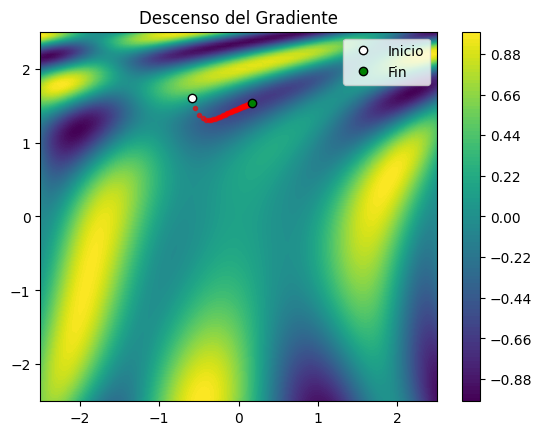

Solución final: [0.17459274029704042, 1.5398055877595862] Valor de f(P): -0.6488870597092794


In [30]:
resolucion = 100
rango = 2.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

P = [random.uniform(-2, 2), random.uniform(-2, 2)]
plt.plot(P[0], P[1], "o", c="white", markeredgecolor="black", label="Inicio")

TA = 0.05
for _ in range(50):
    grad = df(P)

    P[0] = P[0] - TA * grad[0]
    P[1] = P[1] - TA * grad[1]

    plt.plot(P[0], P[1], ".", c="red", alpha=0.6)

plt.plot(P[0], P[1], "o", c="green", markeredgecolor="black", label="Fin")
plt.legend()
plt.title("Descenso del Gradiente")
plt.show()

print("Solución final:", P, "Valor de f(P):", f(P))

*Nota sobre la redacción*

*Tras la elaboración de este trabajo, se ha utilizado la IA Google Gemini como herramienta de apoyo para revisar y optimizar la claridad y el estilo de la redacción en algunos puntos.*